In [24]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
energy_efficiency = fetch_ucirepo(id=242)

X = energy_efficiency.data.features
y = energy_efficiency.data.targets

In [25]:
new_columns = {}
for row in energy_efficiency.variables.itertuples():
    new_columns[getattr(row, 'name')] = getattr(row, 'description')

X = X.rename(columns=new_columns)
X

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [129]:
import random
y = y.rename(columns=new_columns)
y['Cooling Load'] =  y['Cooling Load'] + random.uniform(-5, 5)
y['Heating Load'] = y['Heating Load'] + random.uniform(-5, 5)
X['Roof Area'] =  X['Roof Area'].apply(lambda x : x + + random.uniform(-20, 20))
X['Roof Area']

0       99.087434
1       96.473968
2      129.918806
3      128.613264
4      138.692185
          ...    
763    242.614538
764    234.060758
765    228.622154
766    232.654076
767    227.814392
Name: Roof Area, Length: 768, dtype: float64

In [130]:
df = X
df['Heating Load'] = y['Heating Load']
df['Cooling Load'] = y['Cooling Load']

In [131]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,99.087434,7.0,2,0.0,0,37.586008,36.53732
1,0.98,514.5,294.0,96.473968,7.0,3,0.0,0,37.586008,36.53732
2,0.98,514.5,294.0,129.918806,7.0,4,0.0,0,37.586008,36.53732
3,0.98,514.5,294.0,128.613264,7.0,5,0.0,0,37.586008,36.53732
4,0.90,563.5,318.5,138.692185,7.0,2,0.0,0,42.876008,43.48732


In [132]:
df.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-0.841892,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,0.853387,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-0.277565,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof Area,-8.418916e-01,8.533874e-01,-2.775650e-01,1.000000,-9.375127e-01,7.371996e-03,-2.288179e-02,-1.539538e-02,-0.835348,-0.834917
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-0.937513,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,0.007372,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-0.022882,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing Area Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-0.015395,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-0.835348,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-0.834917,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


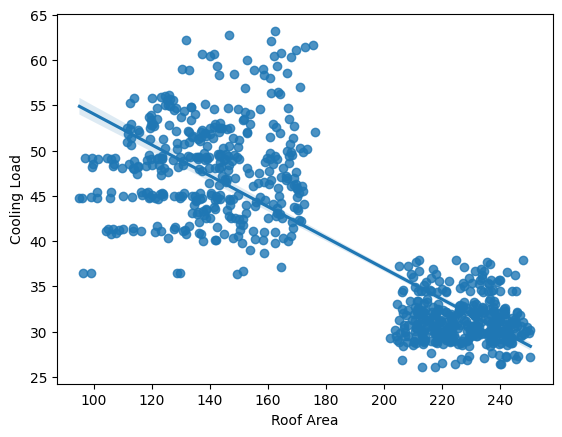

In [133]:
# Let's try and draw a regplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(df, y='Cooling Load', x='Roof Area')
plt.show()

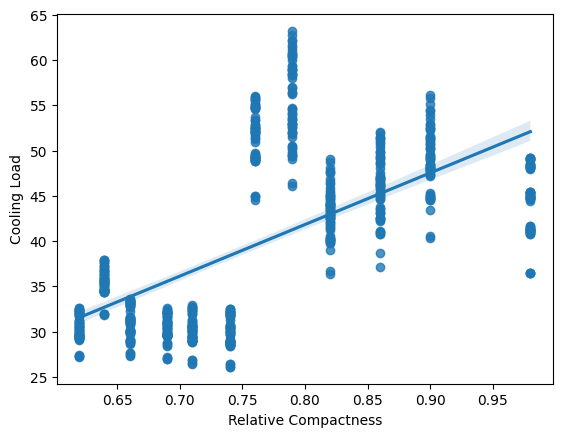

In [134]:
sns.regplot(df, y='Cooling Load', x='Relative Compactness')
plt.show()

## Let's train a stochastic linear regression model.

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(df['Roof Area'], df['Cooling Load'], test_size=0.2)

reg_model = Sequential()
reg_model.add(
    Dense(units=1, input_dim=1, activation='linear')
)
reg_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.5))
history = reg_model.fit(
    X_train, y_train,  batch_size=10000, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 77ms/step - loss: 37784.9414
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 10105.5713
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 431.5423
Epoch 4/2000
1/1 [==============================] - 0s 2ms/step - loss: 4028.2104
Epoch 5/2000
1/1 [==============================] - 0s 2ms/step - loss: 10772.7734
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 13035.5957
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 10427.4531
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 5781.5840
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 1885.7122
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 333.3315
Epoch 11/2000
1/1 [==============================] - 0s 2ms/step - loss: 1201.9034
Epoch 12/2000
1/1 [==============================] - 0s 1ms/step - loss: 3293.7092
Epoch 13/

/Users/rufelleemmanuelpactol/DataspellProjects/EnergyEffeciency/venv/lib/python3.9/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 2ms/step - loss: 394.7466
Epoch 48/2000
1/1 [==============================] - 0s 2ms/step - loss: 326.3520
Epoch 49/2000
1/1 [==============================] - 0s 1ms/step - loss: 315.3346
Epoch 50/2000
1/1 [==============================] - 0s 2ms/step - loss: 353.9163
Epoch 51/2000
1/1 [==============================] - 0s 2ms/step - loss: 402.0115
Epoch 52/2000
1/1 [==============================] - 0s 2ms/step - loss: 419.9576
Epoch 53/2000
1/1 [==============================] - 0s 1ms/step - loss: 396.1233
Epoch 54/2000
1/1 [==============================] - 0s 1ms/step - loss: 350.6306
Epoch 55/2000
1/1 [==============================] - 0s 1ms/step - loss: 316.0101
Epoch 56/2000
1/1 [==============================] - 0s 2ms/step - loss: 311.9392
Epoch 57/2000
1/1 [==============================] - 0s 1ms/step - loss: 333.0440
Epoch 58/2000
1/1 [==============================] - 0s 2ms/step - loss: 356.7442
Epoch 59/2000
1/1 [===========

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 1774/2000
1/1 [==============================] - 0s 2ms/step - loss: 27.4811
Epoch 1775/2000
1/1 [==============================] - 0s 1ms/step - loss: 27.4810
Epoch 1776/2000
1/1 [==============================] - 0s 1ms/step - loss: 27.4810
Epoch 1777/2000
1/1 [==============================] - 0s 1ms/step - loss: 27.4810
Epoch 1778/2000
1/1 [==============================] - 0s 1ms/step - loss: 27.4810
Epoch 1779/2000
1/1 [==============================] - 0s 1ms/step - loss: 27.4809
Epoch 1780/2000
1/1 [==============================] - 0s 2ms/step - loss: 27.4809
Epoch 1781/2000
1/1 [==============================] - 0s 1ms/step - loss: 27.4809
Epoch 1782/2000
1/1 [==============================] - 0s 1ms/step - loss: 27.4809
Epoch 1783/2000
1/1 [==============================] - 0s 1ms/step - loss: 27.4808
Epoch 1784/2000
1/1 [==============================] - 0s 2ms/step - loss: 27.4808
Epoch 1785/2000
1/1 [==============================] - 0s 1ms/step - loss: 27.4808
Epoc

In [125]:
reg_model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 794us/step - loss: 61.7951


61.7950553894043

KeyError: 'val_loss'

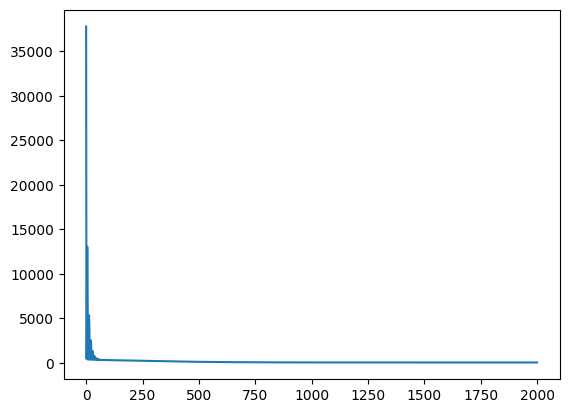

In [140]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

5/5 [==============================] - 0s 535us/step


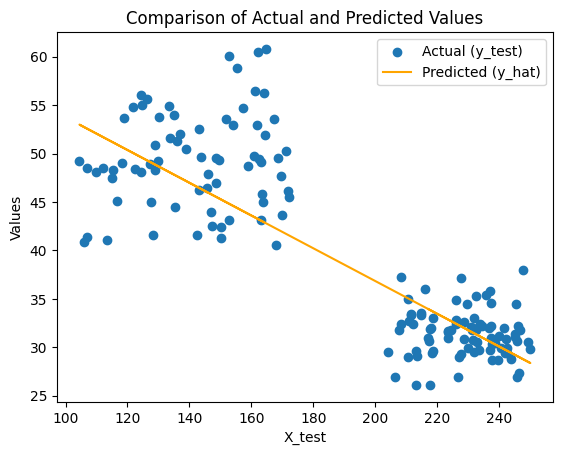

In [141]:
y_hat = reg_model.predict(X_test)
plt.scatter(X_test.squeeze(), y_test, label='Actual (y_test)')
plt.plot(X_test.squeeze(), y_hat, label='Predicted (y_hat)', color='orange')
plt.xlabel('X_test')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [138]:
X_test

384    122.252183
412    237.743396
279    236.544142
456    249.191846
595    162.585136
          ...    
547    161.162961
742    120.561077
504    223.175438
176    213.233124
493    150.377864
Name: Roof Area, Length: 154, dtype: float64